In [1]:
import numpy as np
from scipy.stats import norm as normal
import matplotlib.pyplot as plt
import time
%matplotlib inline

def graphs(functions, x_ranges, format_str='r-', lw=1., plts_per_row=4):
    if len(functions) != len(x_ranges):
        raise ValueError("The number of functions ({}) doesn't equal the number of x ranges ({})."
                         .format(len(functions), len(x_ranges)))
    numb_plots = len(functions)
    nrows = numb_plots // plts_per_row + (0 if numb_plots % plts_per_row == 0 else 1)
    fig, axes = plt.subplots(nrows=nrows, ncols=plts_per_row, sharex=False, sharey=True,
                             figsize=(20 * (plts_per_row/4), (4/plts_per_row) * np.log(1 + np.exp(nrows+plts_per_row))))
    if numb_plots > 1: axes = axes.ravel()

    for k, fx in enumerate(zip(functions, x_ranges)):
        f, x_range = fx[0], np.array(fx[1])
        ax = axes[k] if numb_plots > 1 else axes
        ax.plot(x_range, f(x_range), format_str, lw=lw)

def graphs_1plt(functions, labels, x_range, lw=1.):
    if len(functions) != len(labels):
        raise ValueError("The number of functions ({}) doesn't equal the number of labels ({})."
                         .format(len(functions), len(labels)))
    for fl in zip(functions, labels):
        f, label = fl[0], np.array(fl[1])
        plt.plot(x_range, f(x_range), lw=lw, label=label)
        plt.legend()

From class-notes-1, p.16-19:

The __sigmoid__ or __logistic function__ is

$$
g(z)\equiv\frac{1}{1+e^{-z}}
$$

This function __squashes__ the real line to the open interval $(0,1)$:

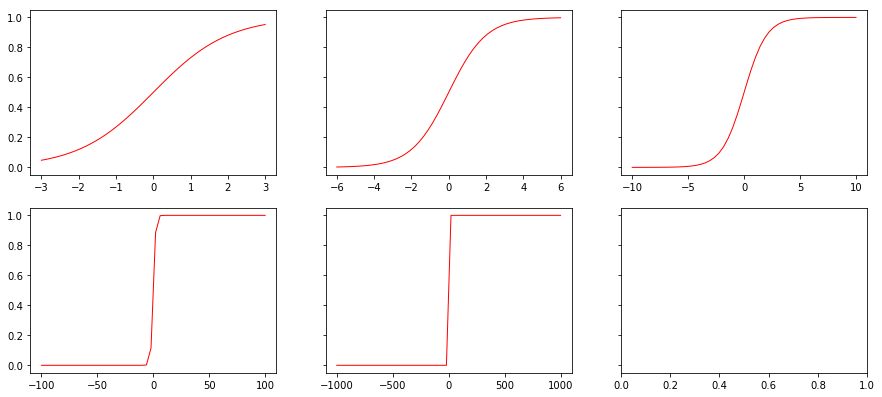

In [2]:
def sigmoid(z):
    # we want to prevent overflow in np.exp(), so we first clip z
    signal = np.clip(z, -700, 700)
    return 1. / (1 + np.exp(-signal))

zs = [np.linspace(-i,i) for i in [3,6,10,100,1000]]
fs = len(zs)*[sigmoid]
graphs(fs, zs, plts_per_row=3)

The sigmoid has some important properties:

$$\begin{gather}
0 < g(z) < 1\quad\text{for all }z\in\mathbb{R}\tag{Sigmoid.1}\\\\
\lim_{z\rightarrow-\infty}g(z)=0\tag{Sigmoid.2}\\\\
\lim_{z\rightarrow\infty}g(z)=1\tag{Sigmoid.3}\\\\
g(0)=\frac{1}{2}\tag{Sigmoid.4}\\\\
g(-z)=1-g(z)\tag{Sigmoid.5}\\\\
\frac{d}{dz}g(z)=g(z)(1-g(z))\tag{Sigmoid.6}\\\\
\end{gather}$$

The first three properties make the sigmoid a cumulative distribution function.

Sigmoid.1 follows because: we see that $g>0$ since the denominator $1+e^{-z}$ is positive for all $z$. To show that $g(z)<1$ for all $z\in\mathbb{R}$, we want to show that $1+e^{-z}=\frac{1}{g(z)}>1$ for all $z\in\mathbb{R}$. This is equivalent to showing that $e^{-z}>0$ for all $z\in\mathbb{R}$, which we know is true.

Sigmoid.2 follows because:

$$
\lim_{z\rightarrow-\infty}g(z)=\frac{1}{1+\lim_{z\rightarrow-\infty}e^{-z}}=\frac{1}{1+e^{--\infty}}=\frac{1}{1+e^{\infty}}=\frac{1}{1+\infty}=0
$$

Sigmoid.3 follows because: 

$$
\lim_{z\rightarrow\infty}g(z)=\frac{1}{1+\lim_{z\rightarrow\infty}e^{-z}}=\frac{1}{1+e^{-\infty}}=\frac{1}{1+0}=1
$$

Sigmoid.4 follows because $g(0)=\frac{1}{1+e^{-0}}=\frac{1}{1+1}=\frac{1}{2}$.

Sigmoid.5 follows because: 

$$
g(-z)=\frac{1}{1+e^{--z}}=\frac{1}{1+e^{z}}=\frac{e^{-z}}{e^{-z}(1+e^{z})}=\frac{1+e^{-z}-1}{1+e^{-z}}=1-\frac{1}{1+e^{-z}}=1-g(z)
$$

Sigmoid.6 follows because:

$$
\frac{d}{dz}g(z) =\frac{d\big(\frac{1}{1 + e^{-z}}\big)}{dz}  
                              =\frac{0 - 1 \cdot\frac{d(1 + e^{-z})}{dz}}{(1 + e^{-z})^2} 
                              =\frac{--e^{-z}}{(1 + e^{-z})^2}
                              =\frac{e^{-z}}{(1 + e^{-z})^2} 
                              =\frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}}
                              =g(z) \cdot \frac{1+e^{-z}-1}{1 + e^{-z}}
                              =g(z)(1 - g(z))
$$

Since the sigmoid is a CDF, its derivative is a probability density function. It's interesting to compare its graph to that of the normal:

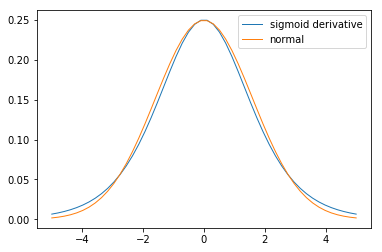

In [3]:
def sigmoid_grad(z):
    s = sigmoid(z)
    return s * (1 - s)

fs = [sigmoid_grad, normal(0,1.6).pdf]
labels = ['sigmoid derivative', 'normal']

graphs_1plt(fs, labels, np.linspace(-5, 5))

We are given training data $X$ and $y$:

$$
X = \begin{bmatrix}x_0^{(1)}&\dots&x_n^{(1)}\\\vdots&\ddots&\vdots\\x_0^{(m)}&\dots&x_n^{(m)}\end{bmatrix}
=\begin{bmatrix}(x^{(1)})^T\\\vdots\\(x^{(m)})^T\end{bmatrix}
\quad\quad
y=\begin{bmatrix}y^{(1)}\\\vdots\\y^{(m)}\end{bmatrix}
$$

where $x_0^{(i)}=1$ for all $i$ and $y^{(i)}\in\{0,1\}$ for all $i$. What is the probability distribution of the $y^{(i)}$'s given the $x^{(i)}$'s? The joint probability is given by $P(y|X;\theta)$. This quantity is typically viewed a function of $y$ (and perhaps $X$),
for a fixed value of $\theta$. When we wish to explicitly view this as a function of $\theta$, we will instead call it the likelihood function:

$$
L(\theta)=L(\theta;X,y) = P(y|X;\theta)
$$

We assume that $y$ is conditionally independent given $X$:

$$
L(\theta)=P(y|X;\theta)=\prod_{i=1}^{m}P(y^{(i)}|x^{(i)};\theta)\tag{BLR.1}
$$

The principal of maximum likelihood says that we should should choose $\theta$ so as to make the data as high probability as possible. I.e., we should choose $\theta$ to maximize $L(\theta)$.

We define the hypothesis (the function to be learned from the training) as

$$
h_\theta(x)\equiv g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}
$$

and we assume that

$$\begin{gather}
P(y^{(i)}=1|x^{(i)};\theta) = h_\theta(x^{(i)})\\\\
P(y^{(i)}=0|x^{(i)};\theta) = 1-h_\theta(x^{(i)})\\\\
\end{gather}$$

This can be written more compactly:

$$
P(y^{(i)}|x^{(i)};\theta) = \big(h_\theta(x^{(i)})\big)^{y^{(i)}}\big(1-h_\theta(x^{(i)})\big)^{1-y^{(i)}}
$$

Then BLR.1 becomes

$$
L(\theta)=P(y|X;\theta)=\prod_{i=1}^{m}P(y^{(i)}|x^{(i)};\theta)=\prod_{i=1}^{m}\big(h_\theta(x^{(i)})\big)^{y^{(i)}}\big(1-h_\theta(x^{(i)})\big)^{1-y^{(i)}}\tag{BLR.2}
$$

As usual, it is easier to maximize the log-likelihood:

$$\begin{align*}
\ell(\theta)=\log[L(\theta)]&=\sum_{i=1}^{m}\log\big[\big(h_\theta(x^{(i)})\big)^{y^{(i)}}\big(1-h_\theta(x^{(i)})\big)^{1-y^{(i)}}\big]\\
    &=\sum_{i=1}^{m}\log\big[\big(h_\theta(x^{(i)})\big)^{y^{(i)}}\big]+\log\big[\big(1-h_\theta(x^{(i)})\big)^{1-y^{(i)}}\big]\\
    &=\sum_{i=1}^{m}y^{(i)}\log\big(h_\theta(x^{(i)})\big)+(1-y^{(i)})\log\big(1-h_\theta(x^{(i)})\big)\tag{BLR.3}
\end{align*}$$

Set $z^{(i)}\equiv\theta^Tx^{(i)}$. Then maximizing the log-likelihood is the same as minimizing this objective function:

$$\begin{align*}
J(\theta)\equiv-\frac{1}{m}\ell(\theta)&=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log\big(h_\theta(x^{(i)})\big)+(1-y^{(i)})\log\big(1-h_\theta(x^{(i)})\big)\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log g(z^{(i)})+(1-y^{(i)})\log\big(1-g(z^{(i)})\big)\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log g(z^{(i)})+(1-y^{(i)})\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log g(z^{(i)})+\log g(-z^{(i)})-y^{(i)}\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\big[\log g(z^{(i)})-\log\big(g(-z^{(i)})\big)\big]+\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log\frac{g(z^{(i)})}{g(-z^{(i)})}+\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log\Big(g(z^{(i)})\frac{1}{g(-z^{(i)})}\Big)+\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log\Big(\frac{1}{1+e^{-z^{(i)}}}\frac{1}{\frac{1}{1+e^{z^{(i)}}}}\Big)+\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log\Big(\frac{1}{1+e^{-z^{(i)}}}\frac{1+e^{z^{(i)}}}{1}\Big)+\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log\Big(\frac{1+e^{z^{(i)}}}{1+e^{-z^{(i)}}}\Big)+\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log\Big(\frac{e^{z^{(i)}}(e^{-z^{(i)}}+1)}{1+e^{-z^{(i)}}}\Big)+\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log\big(e^{z^{(i)}}\big)+\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}z^{(i)}+\log g(-z^{(i)})\\
    &=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\theta^Tx^{(i)}+\log \frac{1}{1+e^{z^{(i)}}}\\
    &=\frac{1}{m}\sum_{i=1}^{m}-y^{(i)}\theta^Tx^{(i)}-\log \frac{1}{1+e^{z^{(i)}}}\\
    &=\frac{1}{m}\sum_{i=1}^{m}-y^{(i)}\theta^Tx^{(i)}+\log\Big(\Big[\frac{1}{1+e^{z^{(i)}}}\Big]^{-1}\Big)\\
    &=\frac{1}{m}\sum_{i=1}^{m}-y^{(i)}\theta^Tx^{(i)}+\log (1+e^{z^{(i)}})\\
    &=\frac{1}{m}\sum_{i=1}^{m}\log(1+e^{\theta^Tx^{(i)}})-y^{(i)}\theta^Tx^{(i)}\\
\end{align*}$$

Succintly, we have

$$
J(\theta)\equiv-\frac{1}{m}\ell(\theta)=\frac{1}{m}\sum_{i=1}^{m}\log(1+e^{\theta^Tx^{(i)}})-y^{(i)}\theta^Tx^{(i)}\tag{BLR.4}\\
$$

NOTE: $J(\theta)\equiv-\frac{1}{m}\ell(\theta)$ is called the negative-log-likelihood objective function. The scaling  term $\frac{1}{m}$ is optional.

Let's take a partial derivative of a single observation:

$$\begin{align*}
\frac{\partial}{\partial \theta_j}\big(\log(1+e^{\theta^Tx^{(i)}})-y^{(i)}\theta^Tx^{(i)}\big) &= \frac{1}{1+e^{\theta^Tx^{(i)}}}e^{\theta^Tx^{(i)}}x_j^{(i)}-y^{(i)}x_j^{(i)}\\\\
     &= \frac{e^{\theta^Tx^{(i)}}}{1+e^{\theta^Tx^{(i)}}}x_j^{(i)}-y^{(i)}x_j^{(i)}\\\\
     &= \frac{e^{-\theta^Tx^{(i)}}e^{\theta^Tx^{(i)}}}{e^{-\theta^Tx^{(i)}}(1+e^{\theta^Tx^{(i)}})}x_j^{(i)}-y^{(i)}x_j^{(i)}\\\\
     &= \frac{1}{1+e^{-\theta^Tx^{(i)}}}x_j^{(i)}-y^{(i)}x_j^{(i)}\\\\
     &= g(\theta^Tx^{(i)})x_j^{(i)}-y^{(i)}x_j^{(i)}\\\\
     &= \big(g(\theta^Tx^{(i)})-y^{(i)}\big)x_j^{(i)}\\\\
\end{align*}$$

So we have

$$\begin{align*}
\frac{\partial}{\partial \theta_j}J(\theta) &= \frac{1}{m}\sum_{i=1}^{m}\big(g(\theta^Tx^{(i)})-y^{(i)}\big)x_j^{(i)}\\
\end{align*}$$

Note that for $a^{(i)}\in\mathbb{R}$ and $b^{(i)}\in\mathbb{R}^2$, we have

$$\begin{align*}
\begin{bmatrix}\sum_{i=1}^{2}a^{(i)}b_1^{(i)}\\\sum_{i=1}^{2}a^{(i)}b_2^{(i)}\end{bmatrix} &= \begin{bmatrix}a^{(1)}b_1^{(1)}+a^{(2)}b_1^{(2)}\\a^{(1)}b_2^{(1)}+a^{(2)}b_2^{(2)}\end{bmatrix}\\\\
    &= \begin{bmatrix}a^{(1)}b_1^{(1)}\\a^{(1)}b_2^{(1)}\end{bmatrix}+\begin{bmatrix}a^{(2)}b_1^{(2)}\\a^{(2)}b_2^{(2)}\end{bmatrix}\\\\
    &= a^{(1)}\begin{bmatrix}b_1^{(1)}\\b_2^{(1)}\end{bmatrix}+a^{(2)}\begin{bmatrix}b_1^{(2)}\\b_2^{(2)}\end{bmatrix}\\\\
    &=a^{(1)}b^{(1)}+a^{(2)}b^{(2)}\\\\
    &=\sum_{i=1}^{2}a^{(i)}b^{(i)}\tag{BLR.5}
\end{align*}$$

Hence

$$\begin{align*}
\nabla J(\theta) &= \begin{bmatrix}\frac{1}{m}\sum_{i=1}^{m}\big(g(\theta^Tx^{(i)})-y^{(i)}\big)x_0^{(i)}\\\vdots\\\frac{1}{m}\sum_{i=1}^{m}\big(g(\theta^Tx^{(i)})-y^{(i)}\big)x_n^{(i)}\end{bmatrix}\\\\
     &= \frac{1}{m}\sum_{i=1}^{m}\big(g(\theta^Tx^{(i)})-y^{(i)}\big)x^{(i)}\tag{by BLR.5}\\\\
\end{align*}$$

Alternatively, we can vectorize the gradient:

$$\begin{align*}
\nabla J(\theta) &= \begin{bmatrix}\frac{1}{m}\sum_{i=1}^{m}\big(g(\theta^Tx^{(i)})-y^{(i)}\big)x_0^{(i)}\\\dots\\\frac{1}{m}\sum_{i=1}^{m}\big(g(\theta^Tx^{(i)})-y^{(i)}\big)x_n^{(i)}\end{bmatrix}\\\\
     &= \frac{1}{m}\begin{bmatrix}x_0^{(1)}&\dots&x_0^{(m)}\\\vdots&\ddots&\vdots\\x_n^{(1)}&\dots&x_n^{(m)}\end{bmatrix}\begin{bmatrix}g(\theta^Tx^{(1)})-y^{(1)}\\\vdots\\g(\theta^Tx^{(m)})-y^{(m)}\end{bmatrix}\\\\
     &= \frac{1}{m}X^T(h-y)\\\\
     &= \frac{1}{m}([X^T(h-y)]^T)^T\\\\
     &= \frac{1}{m}((h-y)^TX)^T\\\\
     &= \frac{1}{m}[(g(X\theta)-y)^TX]^T
\end{align*}$$

where

$$\begin{align*}
h\equiv\begin{bmatrix}g(\theta^Tx^{(1)})\\\vdots\\g(\theta^Tx^{(m)})\end{bmatrix}=g\Bigg(\begin{bmatrix}\theta^Tx^{(1)}\\\vdots\\\theta^Tx^{(m)}\end{bmatrix}\Bigg)=g\Bigg(\begin{bmatrix}(x^{(1)})^T\theta\\\vdots\\(x^{(m)})^T\theta\end{bmatrix}\Bigg)=g\Bigg(\begin{bmatrix}(x^{(1)})^T\\\vdots\\(x^{(m)})^T\end{bmatrix}\theta\Bigg)=g(X\theta)
\end{align*}$$

and where $g(v)$ for a vector $v\in\mathbb{R}^n$ means elementwise sigmoid.

We can also vectorize the objective function from BLR.4:

$$\begin{align*}
J(\theta)\equiv-\frac{1}{m}\ell(\theta) &= \frac{1}{m}\sum_{i=1}^{m}\log(1+e^{\theta^Tx^{(i)}})-y^{(i)}\theta^Tx^{(i)}\\\\
     &= \frac{1}{m}\sum_{i=1}^{m}\log(1+e^{(x^{(i)})^T\theta})-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\theta^Tx^{(i)}\\\\
     &= \frac{1}{m}{\Large S}\begin{bmatrix}\log(1+e^{(x^{(1)})^T\theta})\\\vdots\\\log(1+e^{(x^{(m)})^T\theta})\end{bmatrix}-\frac{1}{m}\theta^T\sum_{i=1}^{m}y^{(i)}x^{(i)}\\\\
     &= \frac{1}{m}{\Large S}\begin{bmatrix}\log(1+e^{\langle X_{1:},\theta\rangle})\\\vdots\\\log(1+e^{\langle X_{m:},\theta\rangle})\end{bmatrix}-\frac{1}{m}\theta^T\begin{bmatrix}\sum_{i=1}^{m}y^{(i)}x_0^{(i)}\\\vdots\\\sum_{i=1}^{m}y^{(i)}x_n^{(i)}\end{bmatrix}\tag{by BLR.5}\\\\
     &= \frac{1}{m}{\Large S}\log\Bigg(1+^B\exp\begin{bmatrix}\langle X_{1:},\theta\rangle\\\vdots\\\langle X_{m:},\theta\rangle\end{bmatrix}\Bigg)-\frac{1}{m}\Bigg(\theta^T\begin{bmatrix}\sum_{i=1}^{m}y^{(i)}x_0^{(i)}\\\vdots\\\sum_{i=1}^{m}y^{(i)}x_n^{(i)}\end{bmatrix}\Bigg)^T\\\\
     &= \frac{1}{m}{\Large S}\log\big[1+^B\exp(X\theta)\big]-\frac{1}{m}\begin{bmatrix}\sum_{i=1}^{m}y^{(i)}x_0^{(i)}&\dots&\sum_{i=1}^{m}y^{(i)}x_n^{(i)}\end{bmatrix}\theta\\\\
     &= \frac{1}{m}{\Large S}\log\big[1+^B\exp(X\theta)\big]-\frac{1}{m}\begin{bmatrix}y^{(1)}&\dots&y^{(m)}\end{bmatrix}\begin{bmatrix}x_0^{(1)}&\dots&x_n^{(1)}\\\vdots&\ddots&\vdots\\x_0^{(m)}&\dots&x_n^{(m)}\end{bmatrix}\theta\\\\
     &= \frac{1}{m}\Big({\Large S}\log\big[1+^B\exp(X\theta)\big]-y^TX\theta\Big)\\\\
\end{align*}$$

where ${\large S}$ denotes the sum of the elements of the vector and $1+^Bv$ denotes adding $1$ to each of the elements of the vector $v$ (broadcasting). And for any function $f$ (such as $\log$ or $\exp$) and vector $v$, $f(v)$ denotes elementwise application of the function.

In [4]:
def log_likelihood_cost_slow(X, theta, y):  
    xt = X.dot(theta)
    h = np.clip(sigmoid(xt), 1e-16, 1-(1e-16))
    return np.mean(-y * np.log(h) - (1 - y) * np.log(1 - h))

# this can also be implemented without the scaling term 1/xt.shape[0]
def llc(xt, y, regularlization=0, theta=0):
    return 1/xt.shape[0] * (np.sum(np.log(1 + np.exp(np.clip(xt, -700, 700)))) - np.dot(y,xt)) \
        + (regularlization * (np.linalg.norm(theta)**2))

# this can also be implemented without the scaling term 1/xt.shape[0]
def llg(X, xt, y, regularlization=0, theta=0):
    return 1/xt.shape[0] * (sigmoid(xt) - y).dot(X) + (regularlization * 2 * theta)

def log_likelihood_cost(X, theta, y, cost_or_grad='both', regularlization=0):
    xt = X.dot(theta)
    th = theta if regularlization else 0
    if cost_or_grad == 'both':
        return (llc(xt, y, regularlization=regularlization, theta=th), llg(X, xt, y, regularlization=regularlization, theta=th))
    if cost_or_grad == 'cost':
        return llc(xt, y, regularlization=regularlization, theta=th)
    if cost_or_grad == 'grad':
        return llg(X, xt, y, regularlization=regularlization, theta=th)

def logistic_regression(X, y, learning_rate, scale_lr_geom=False, scale_lr_prop=0, regularlization=0, prntiters=1000, tol=1e-7):
    theta = np.zeros(X.shape[1])
    thetas, thetas_sample, errors, losses = [], [], [], []
    i = 0
    while True:
        i += 1
        prev_theta = theta
        cost, grad = log_likelihood_cost(X, theta, y, regularlization=regularlization, cost_or_grad='both')
        theta = theta - learning_rate * grad
        thetas.append(theta)
        errors.append(np.linalg.norm(prev_theta - theta))
        losses.append(cost)
        if scale_lr_geom: learning_rate /= (i**2)
        if scale_lr_prop: learning_rate *= scale_lr_prop
        if i % prntiters == 0:
            print('iters={} theta={} error={} loss={}'.format(i, np.mean(theta), errors[-1], losses[-1]))
            thetas_sample.append(theta)
        if errors[-1] < tol:
            print('Converged in %d iterations' % i)
            break
        if i == 200 * 1000:
            break
    return np.array(thetas), thetas_sample, errors, losses

def time_tester(X, y, learning_rate, max_iters, and_cost=False, prntiters=1000, opts=False):
    theta = np.zeros(X.shape[1])
    thetas = []
    for i in range(max_iters):
        if and_cost:
            cost, grad = log_likelihood_cost(X, theta, y, cost_or_grad='both')
        else:
            xt = X.dot(theta)
            grad = llg(X, xt, y)
        theta = theta - learning_rate * grad
        if opts:
            error = np.linalg.norm(theta[-1] - theta)
            thetas.append(theta)
            loss = llc(xt, y)
            if i % prntiters == 0:
                print("iter={} theta={} loss={} error={}".format(i, np.mean(theta), loss, error))
    return theta, np.array(thetas)

def compare_cost_fns(X, y, iterations=10*1000):
    theta = np.random.randn(X.shape[1])
    start = time.time()
    for i in range(iterations):
        log_likelihood_cost(X, theta, y, cost_or_grad='cost')
    end = time.time()
    print("training time for fast cost: {} seconds   iters={}".format(end - start, iterations))
    start = time.time()
    for i in range(iterations):
        log_likelihood_cost_slow(X, theta, y)
    end = time.time()
    print("training time for slow cost: {} seconds   iters={}".format(end - start, iterations))

In [5]:
# let's collect and organize the data

Xitn = np.ndfromtxt('images.csv', delimiter=',')
yitn = np.ndfromtxt("labels.csv", delimiter=',', dtype=np.int8)
print("initial Xitn={}  yitn={}".format(Xitn.shape, yitn.shape))

ind = np.logical_or(yitn == 1, yitn == 0)
Xind = Xitn[ind, :]
yind = yitn[ind]
print("ind={}  sumind={}  Xind={}  yind={}".format(ind.shape, np.sum(ind), Xind.shape, yind.shape))

num_train = int(len(yind) * 0.8)
X_train = Xind[0:num_train, :]
X_test = Xind[num_train:-1,:]
y_train = yind[0:num_train]
y_test = yind[num_train:-1]
print("X_train={}  X_test={}  y_train={}  y_test={}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Xy_train = np.hstack((X_train, y_train.reshape(-1,1)))
Xy_test = np.hstack((X_test, y_test.reshape(-1,1)))
print("Xy_train={}  Xy_test={}".format(Xy_train.shape, Xy_test.shape))

initial Xitn=(10000, 784)  yitn=(10000,)
ind=(10000,)  sumind=2115  Xind=(2115, 784)  yind=(2115,)
X_train=(1692, 784)  X_test=(422, 784)  y_train=(1692,)  y_test=(422,)
Xy_train=(1692, 785)  Xy_test=(422, 785)


In [6]:
# verify cost function

obs, attrs = 1695, 37
iterations = 5 * 1000
wrong = 0

for i in range(iterations):
    Xct = np.random.rand(obs, attrs)
    theta = np.random.rand(attrs)
    yct = np.random.rand(obs)
    cost_s = log_likelihood_cost_slow(Xct, theta, yct)
    cost_f = log_likelihood_cost(Xct, theta, yct, cost_or_grad='cost')
    if np.abs(cost_s - cost_f) > 5e-13:
        print("WRONG: slow cost={}  fast cost={}  diff={}".format(cost_s, cost_f, cost_s - cost_f))
        wrong+=1

print("wrong={}  iters={}  perc={}".format(wrong, iterations, wrong/iterations))

WRONG: slow cost=5.573007834682271  fast cost=5.573007834681763  diff=5.080380560684716e-13
WRONG: slow cost=5.896191305178432  fast cost=5.8961913051791255  diff=-6.936673457857978e-13
WRONG: slow cost=5.501053995663017  fast cost=5.5010539956625  diff=5.169198402654729e-13
WRONG: slow cost=5.91613088315236  fast cost=5.9161308831531265  diff=-7.664979762012081e-13
WRONG: slow cost=5.534945654772681  fast cost=5.534945654773196  diff=-5.151434834260726e-13
WRONG: slow cost=5.479477598436633  fast cost=5.479477598436003  diff=6.297184995673888e-13
WRONG: slow cost=5.855639574742285  fast cost=5.855639574743685  diff=-1.3997691894473974e-12
WRONG: slow cost=5.769005834530796  fast cost=5.769005834531689  diff=-8.926193117986259e-13
WRONG: slow cost=5.469440024404497  fast cost=5.469440024405206  diff=-7.096545573404001e-13
WRONG: slow cost=5.764425494888452  fast cost=5.764425494887692  diff=7.602807272633072e-13
WRONG: slow cost=6.345137061248626  fast cost=6.345137061247452  diff=1.17

In [7]:
# gradient speed test 1
# This gradient implementation is from the cs229 Vectorization discussion: logistic_regression.py.
# The two implementations take about the same amount of time to run, on this speed test and the
# next one. But mine is consistently, slightly faster.

def h_vec(theta, X):
    signal = np.clip( np.matmul(X, theta), -500, 500 )
    return 1 / (1 + np.exp(-signal))

def GD (theta, X_train, y_train, alpha):
    diff = h_vec(theta, X_train) - y_train
    diff = np.reshape(diff, [1, -1])
    dx = np.matmul(diff, X_train)
    theta -= alpha * np.squeeze(dx)
    return theta
    
def train_vec(X_train, y_train, max_iter, alpha):
    theta = np.zeros(X_train.shape[1])
    for i in range(max_iter):
        theta = GD(theta, X_train, y_train, alpha)       
    return theta

speed_test_iterations = 10 * 1000
alpha = 0.01

start = time.time()
theta = train_vec(X_train, y_train, speed_test_iterations, alpha)
end = time.time()
pred = (np.sign(h_vec(theta, X_test) - 0.5) + 1) / 2
print("time elapsed: {} seconds   percent={}".format(end - start, np.sum(pred == y_test) / len(y_test)))

start = time.time()
theta, thetas = time_tester(X_train, y_train, learning_rate=alpha, max_iters=speed_test_iterations, and_cost=False, opts=False)
end = time.time()
h = sigmoid(X_test.dot(theta))
pred = (np.sign(h - 0.5) + 1) / 2
print("time elapsed: {} seconds   percent={}".format(end - start, np.sum(pred == y_test) / len(y_test)))

time elapsed: 5.473459959030151 seconds   percent=1.0
time elapsed: 5.445704936981201 seconds   percent=1.0


In [8]:
# gradient speed test 2

import random
rs=2
np.random.seed(rs)
random.seed(rs)

speed_test_iterations = 10 * 1000
alpha = .01
numb_obs = 23 * 1000
Xst = np.random.rand(numb_obs,784)
yst = np.array([random.getrandbits(1) for i in range(numb_obs)])

start = time.time()
theta, thetas = time_tester(Xst, yst, learning_rate=alpha, max_iters=speed_test_iterations, and_cost=False, opts=False)
end = time.time()
print("training time: {} seconds   iters={}".format(end - start, speed_test_iterations))

start = time.time()
theta = train_vec(Xst, yst, speed_test_iterations, alpha)
end = time.time()
print("training time: {} seconds   iters={}".format(end - start, speed_test_iterations))

training time: 88.40023493766785 seconds   iters=10000
training time: 88.92623400688171 seconds   iters=10000


In [9]:
# cost speed test

compare_cost_fns(X_train, y_train, iterations=100*1000)

training time for fast cost: 28.637451887130737 seconds   iters=100000
training time for slow cost: 31.423377752304077 seconds   iters=100000


In [10]:
# This is logistic regression with the logisitic cost, from PS-02, Q1:

def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def logistic_cost(probs, regularlization=0, theta=0):
    return -np.mean(np.log(probs)) + (regularlization * (np.linalg.norm(theta)**2))

def logistic_grad(X, Y, probs, regularlization=0, theta=0):
    return -(1./X.shape[0]) * (X.T.dot(probs * Y)) + (regularlization * 2 * theta)

def logistic_cost_and_grad(X, Y, theta, regularlization=0, cog='both'):
    margins = Y * X.dot(theta)
    th = theta if regularlization else 0
    if cog == 'grad':
        probs = sigmoid(-margins)
        return logistic_grad(X, Y, probs, regularlization=regularlization, theta=th)
    if cog == 'cost':
        probs = sigmoid(margins)
        return logistic_cost(probs, regularlization=regularlization, theta=th)
    if cog == 'both':
        pc = sigmoid(margins)
        pg = 1 - pc
        cost = logistic_cost(pc, regularlization=regularlization, theta=th)
        grad = logistic_grad(X, Y, pg, regularlization=regularlization, theta=th)
        return cost, grad

def logistic_regression_2(X, Y, scale_lr_geom=False, scale_lr_prop=0, regularlization=0, tol=1e-15):
    theta = np.zeros(X.shape[1])
    learning_rate = 10
    thetas, thetas_sample, errors, losses = [], [], [], []
    i = 0
    while True:
        i += 1
        prev_theta = theta
        cost, grad = logistic_cost_and_grad(X, Y, theta, regularlization=regularlization, cog='both')
        theta = theta - learning_rate * grad
        thetas.append(theta)
        errors.append(np.linalg.norm(prev_theta - theta))
        losses.append(cost)
        if scale_lr_geom: learning_rate /= (i**2)
        if scale_lr_prop: learning_rate *= scale_lr_prop
        if i % 10000 == 0:
            print('iters={} theta={} error={} loss={}'.format(i, theta, errors[-1], losses[-1]))
            thetas_sample.append(theta)
        if errors[-1] < tol:
            print('Converged in %d iterations' % i)
            break
        if i == 200 * 1000:
            break
    return np.array(thetas), thetas_sample, errors, losses

In [11]:
y_train_2 = y_train.copy()
print(sum(y_train_2==0))
y_train_2[y_train_2==0]=-1
print(sum(y_train_2==-1))

y_test_2 = y_test.copy()
print(sum(y_test_2==0))
y_test_2[y_test_2==0]=-1
print(sum(y_test_2==-1))

781
781
199
199


In [12]:
# Notice that the gradient of the logistic cost gives much faster convergence and the same accuracy

thetas_2, thetas_sample_2, errors_2, losses_2 = logistic_regression_2(X_train, y_train_2, .01, tol=1e-15)
pred = np.sign(sigmoid(X_test.dot(thetas_2[-1])) - 0.5)
number_correct = np.sum(pred == y_test_2)
number_tested = len(y_test_2)
print("number_correct={}  number_tested={}  percentage correct={}".format(number_correct, number_tested, number_correct / number_tested))

Converged in 13 iterations
number_correct=422  number_tested=422  percentage correct=1.0


In [13]:
thetas, thetas_sample, errors, losses = logistic_regression(X_train, y_train, learning_rate=.01, regularlization=0, prntiters=1000, tol=8e-8)

iters=1000 theta=-0.03385757677723093 error=5.423972289571108e-07 loss=-1263.8944895305808
iters=2000 theta=-0.03386206920521454 error=2.6862897258321127e-07 loss=-1263.7935615838076
iters=3000 theta=-0.03386468216836832 error=1.7853010353704674e-07 loss=-1263.7348767853491
iters=4000 theta=-0.033866532036649334 error=1.3369190404779807e-07 loss=-1263.693335521272
iters=5000 theta=-0.03386796522412732 error=1.0685567410204589e-07 loss=-1263.6611535129487
iters=6000 theta=-0.03386913536648768 error=8.899239383794842e-08 loss=-1263.6348792347956
Converged in 6673 iterations


In [14]:
theta = thetas[-1]
theta.shape
h = sigmoid(X_test.dot(theta))
np.sum([(h>1e-230) & (h<1-1e-230)])

2

In [15]:
pred = (np.sign(h - 0.5) + 1) / 2
number_correct = np.sum(pred == y_test)
number_tested = len(y_test)
print("number_correct={}  number_tested={}  percentage correct={}".format(number_correct, number_tested, number_correct / number_tested))

number_correct=422  number_tested=422  percentage correct=1.0
